# 학습곡선

학습 데이터의 양을 늘려가면서 모델의 성능을 평가하여 그래프로 그리는 것.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *

import numpy as np
from sklearn.model_selection import learning_curve

## #02. 속도에 따른 제동거리 데이터의 경우

### [1] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/cars.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None

데이터프레임 상위 5개 행
+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
|  0 |       4 |      2 |
|  1 |       4 |     10 |
|  2 |       7 |      4 |
|  3 |       7 |     22 |
|  4 |       8 |     16 |
+----+---------+--------+

데이터프레임 하위 5개 행
+----+---------+--------+
|    |   speed |   dist |
|----+---------+--------|
| 45 |      24 |     70 |
| 46 |      24 |     92 |
| 47 |      24 |     93 |
| 48 |      24 |    120 |
| 49 |      25 |     85 |
+----+---------+--------+

기술통계
+-------+---------+--------+---------+-------+-------+-------+-------+-------+-------+
|       |   count |   mean |     std |   min |   25% |   50% |   75% |   max |   nan |
|-------+---------+--------+--

### [2] 데이터 분할

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='dist', test_size=0.3, scalling=False, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 1), (15, 1), (35,), (15,))

### [3] 선형회귀 모델 구현

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.464509 |
+----+-------------------+

[회귀식]
dist = 3.760 * speed + -15.540

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.578506 |      0.80035 |
| 평균절대오차(MAE)             |      12.1304 |      9.87575 |
| 평균제곱오차(MSE)             |      267.466 |      136.768 |
| 평균오차(RMSE)                |      16.3544 |      11.6948 |
| 평균 절대 백분오차 비율(MAPE) |      35.6357 |      38.8652 |
| 평균 비율 오차(MPE)           |     -12.3076 |     -2.16828 |
+-------------------------------+--------------+--------------+

[학습곡선]


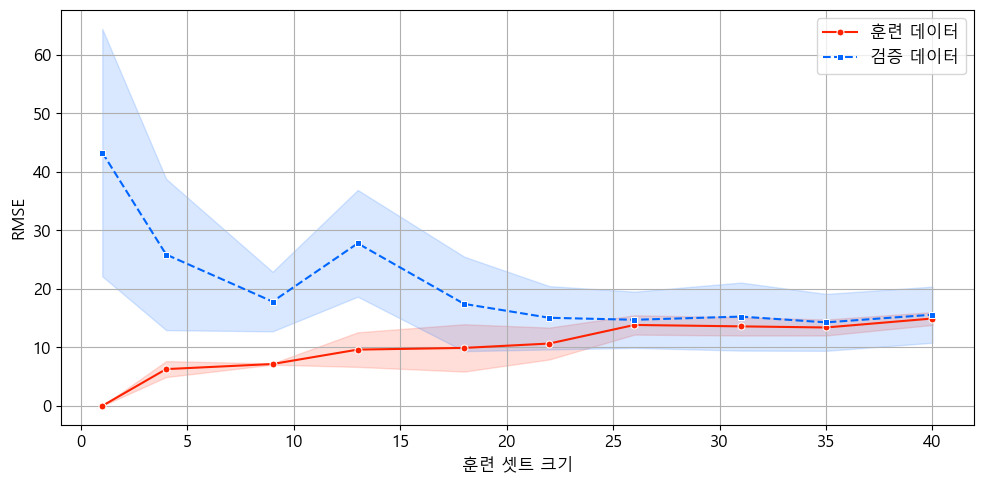

LinearRegression(n_jobs=-1)

In [5]:
fit = my_linear_regression(x_train, y_train, x_test, y_test, degree=1, cv=5, use_plot=True, dpi=100, figsize=(10, 5), report=False)
fit

### [4] 학습곡선

#### (1) 전체 샘플에 대해 독립변수와 종속변수 구분

In [6]:
x = origin.drop('dist', axis=1)
y = origin['dist']

#### (2) 학습곡선 데이터 반환받기

평가지표(`scoring`)이 없을 경우 각 모델별로 기본 평가지표가 사용됨

| 평가지표 | 값 |
|---|---|
| `R2` | `r2` |
| `RMSE` | `neg_root_mean_squared_error` |
| `MSE` | `neg_mean_squared_error` |

In [7]:
train_sizes, train_scores, test_scores = learning_curve(fit, x, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10), scoring='neg_root_mean_squared_error', random_state=123)

print(train_sizes)
print(train_scores)
print(test_scores)

[ 1  5 10 15 20 25 30 35 40 45]
[[ -0.          -0.          -0.          -0.          -0.
   -0.          -0.          -0.          -0.          -0.        ]
 [ -7.94355084  -6.23263301  -6.23263301  -6.23263301  -6.23263301
   -6.23263301  -6.23263301  -6.23263301  -6.23263301  -6.23263301]
 [ -6.9275411   -6.01454254  -7.1535955   -7.1535955   -7.1535955
   -7.1535955   -7.1535955   -7.1535955   -7.1535955   -7.1535955 ]
 [ -7.79432583  -7.27233332  -7.53460458  -6.79751306  -6.79751306
   -6.79751306  -6.79751306  -6.79751306  -6.79751306  -6.79751306]
 [-14.2172902  -14.05671307 -13.92101851 -14.07937541  -7.45213735
   -7.45213735  -7.45213735  -7.45213735  -7.45213735  -7.45213735]
 [-13.57837599 -13.36995659 -13.34426145 -13.39454791  -7.95219067
  -13.10031717 -13.10031717 -13.10031717 -13.10031717 -13.10031717]
 [-14.54693402 -14.5799656  -14.42953589 -14.5623211  -11.13413066
  -13.97682397 -12.65953501 -12.65953501 -12.65953501 -12.65953501]
 [-14.99274331 -14.85702423 -14.

#### (3) 학습곡선 그래프 그리기

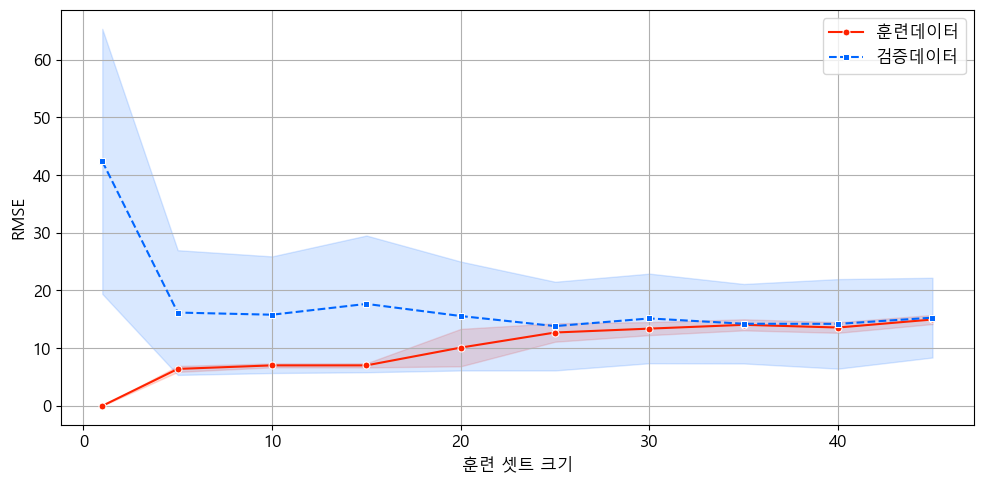

In [8]:
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1) 
test_std = -np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5), dpi=100)

# 훈련 데이터 수에 따른 훈련 데이터의 score 평균
sb.lineplot(x=train_sizes, y=train_mean,  marker='o', markersize=5, label='훈련데이터', color='#ff2200')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='#ff2200')

# 검증 데이터 수에 따른 검증 데이터의 score 평균
sb.lineplot(x=train_sizes, y=test_mean, linestyle='--', marker='s', markersize=5, label='검증데이터', color='#0066ff')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='#0066ff')

plt.grid()
plt.xlabel('훈련 셋트 크기')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

> 처음에는 검증데이터의 성능보다 훈련데이터의 성능이 더 높게 나타나는 과대적합이 발생하지만 데이터의 샘플 수가 25를 넘어서면서 학습 성능과 검증 성능이 비슷해지는 것을 볼 수 있다.
> 
> 아직 학습 성능이 검증 성능보다 높은 상태로 간격이 유지된다면 이 모델은 아직 학습이 충분히 진행되지 않았고, 편향이 크다고 할 수 있지만 이 모델은 학습 성능과 검증 성능의 차이가 크지 않으므로 충분히 학습된 상태라고 볼 수 있다.
>
> 학습 성능과 검증 성능의 간격이 학습 데이터 수를 늘려도 유지된다면 더 이상의 성능 향상이 기대되지는 않는다는 사실을 의미한다.

## #03. 농어의 무게 예측 모형의 경우

### [1] 데이터 가져오기

In [9]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB
None

데이터프레임 상위 5개 행
+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+

데이터프레임 하위 5개 행
+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
| 51 |     42 |   12.8 |   6.87 |   1100 |
| 52 |     43 |  11.93 |   7.28 |   1000 |
| 53 |     43

### [2] 데이터 분할

In [10]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='무게', test_size=0.3, scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 3), (17, 3), (39,), (17,))

### [3] 선형회귀 모형

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.912264 |
+----+-------------------+

[회귀식]
무게 = 55.163 * 길이 + 163.657 * 높이 + 122.869 * 두께 + 400.551

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.949944 |     0.919246 |
| 평균절대오차(MAE)             |      61.8824 |      58.2871 |
| 평균제곱오차(MSE)             |      6089.38 |      8828.88 |
| 평균오차(RMSE)                |      78.0345 |      93.9621 |
| 평균 절대 백분오차 비율(MAPE) |      46.2303 |       327.91 |
| 평균 비율 오차(MPE)           |      22.7633 |      304.702 |
+-------------------------------+--------------+--------------+

[학습곡선]


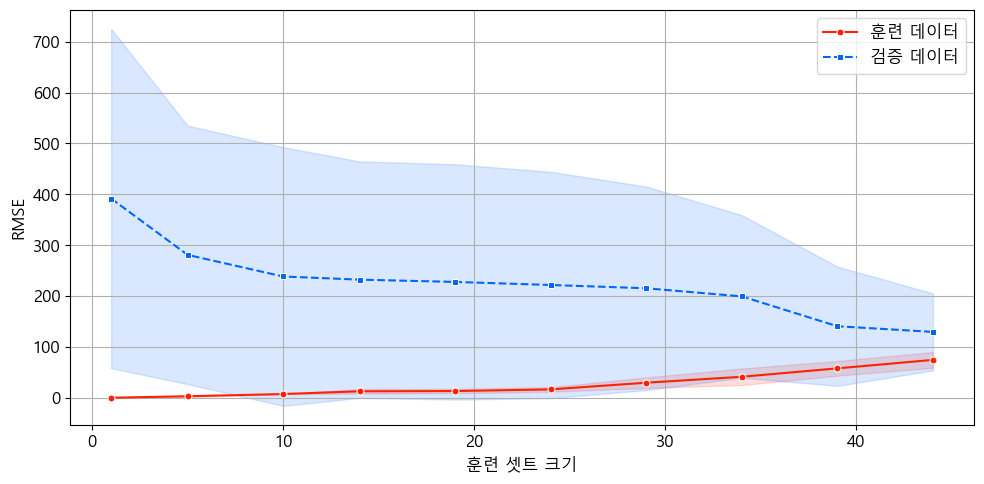


[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |     t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+-------+------------+---------|
|  0 | 무게       | 길이       |             55.163 |    163.922 |           -0.194 | 0.337 |      0.742 | 40.8578 |
|  1 | 무게       | 높이       |            163.657 |    277.626 |            1.055 | 0.589 |      0.566 | 103.178 |
|  2 | 무게       | 두께       |            122.869 |    166.066 |            0.099 |  0.74 |      0.473 | 34.5667 |
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+

𝑅^2(0.919), Adj.𝑅^2(0.901), F(49.328), P-value(2.31e-07), Durbin-Watson(2.067)

무게에 대하여 길이,높이,두께로 예측하는 회귀분석을 실시한 결과,
이 회귀모형은 통계적으로 유의하다(F(3,13) = 49.328, p <= 0.05).

길이의 회귀계수는 55.163(p > 0.05)로, 무게에 대하여 

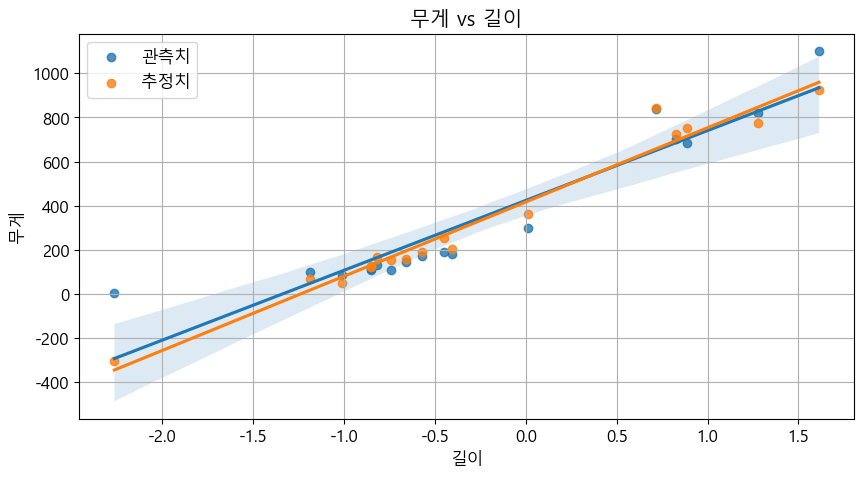

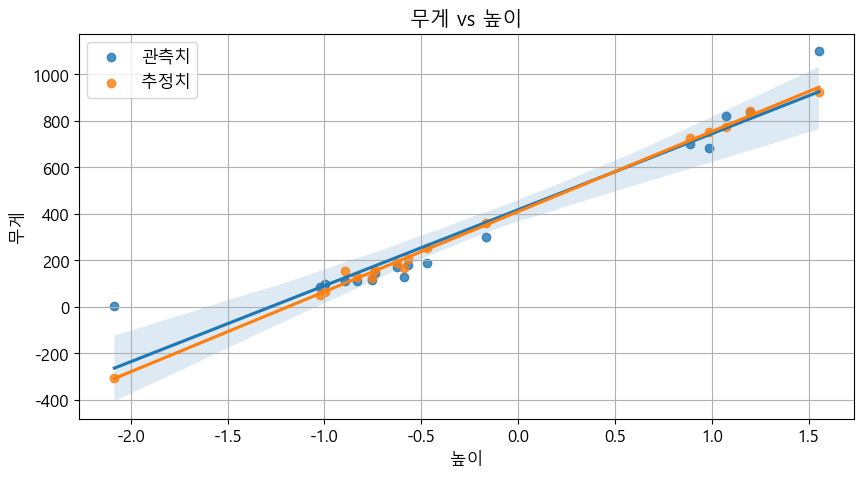

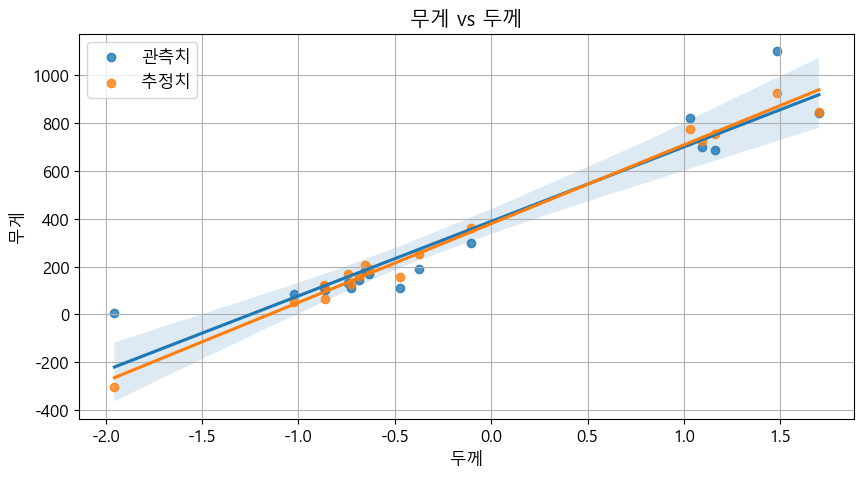

LinearRegression(n_jobs=-1)

In [12]:
fit = my_linear_regression(x_train, y_train, x_test, y_test, degree=1, cv=5, use_plot=True, dpi=100, figsize=(10, 5), report=True)
fit

### [4] 모듈화 기능을 활용한 학습 곡선 확인

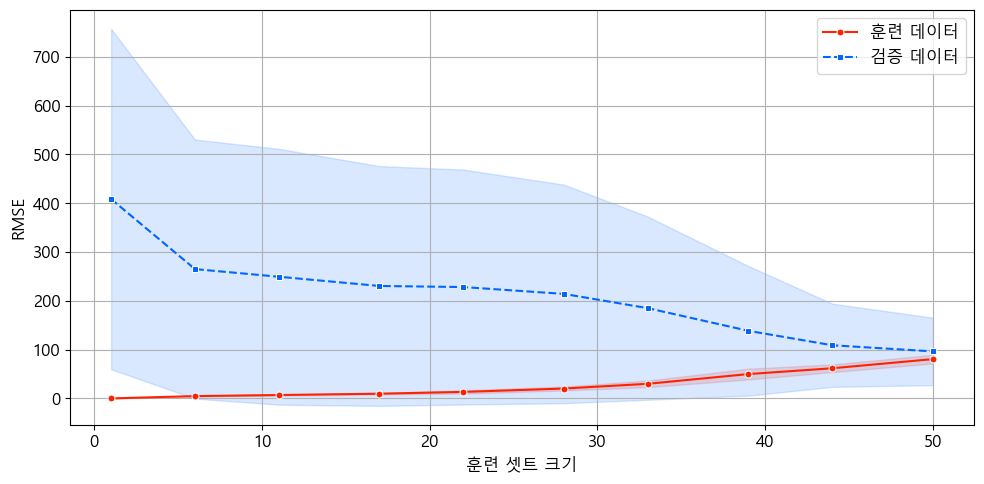

In [13]:
my_learing_curve(fit, data=origin, yname='무게', scalling=True, scoring='RMSE', dpi=100)

> 학습곡선으로 보아 모델이 과대적합 되어 있다. 과대적합을 개선하기 위해 훈련 모델에 더 많은 샘플을 추가해야 한다.

## #04. 보스턴 집값 데이터의 경우

### [1] 데이터 가져오기

In [14]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

데이터프레임 상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD 

### [2] 데이터 분할

In [15]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname="MEDV", scalling=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

### [3] 선형회귀 모델 구현

[회귀식]
MEDV = -1.733 * NOX + 3.238 * RM + -2.288 * DIS + -2.103 * PTRATIO + -4.274 * LSTAT + 22.375

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.733076 |     0.596924 |
| 평균절대오차(MAE)             |      3.36832 |      3.95916 |
| 평균제곱오차(MSE)             |       22.614 |      33.3488 |
| 평균오차(RMSE)                |      4.75542 |      5.77484 |
| 평균 절대 백분오차 비율(MAPE) |      17.8317 |      19.3372 |
| 평균 비율 오차(MPE)           |     -3.93204 |     -2.81396 |
+-------------------------------+--------------+--------------+

[학습곡선]


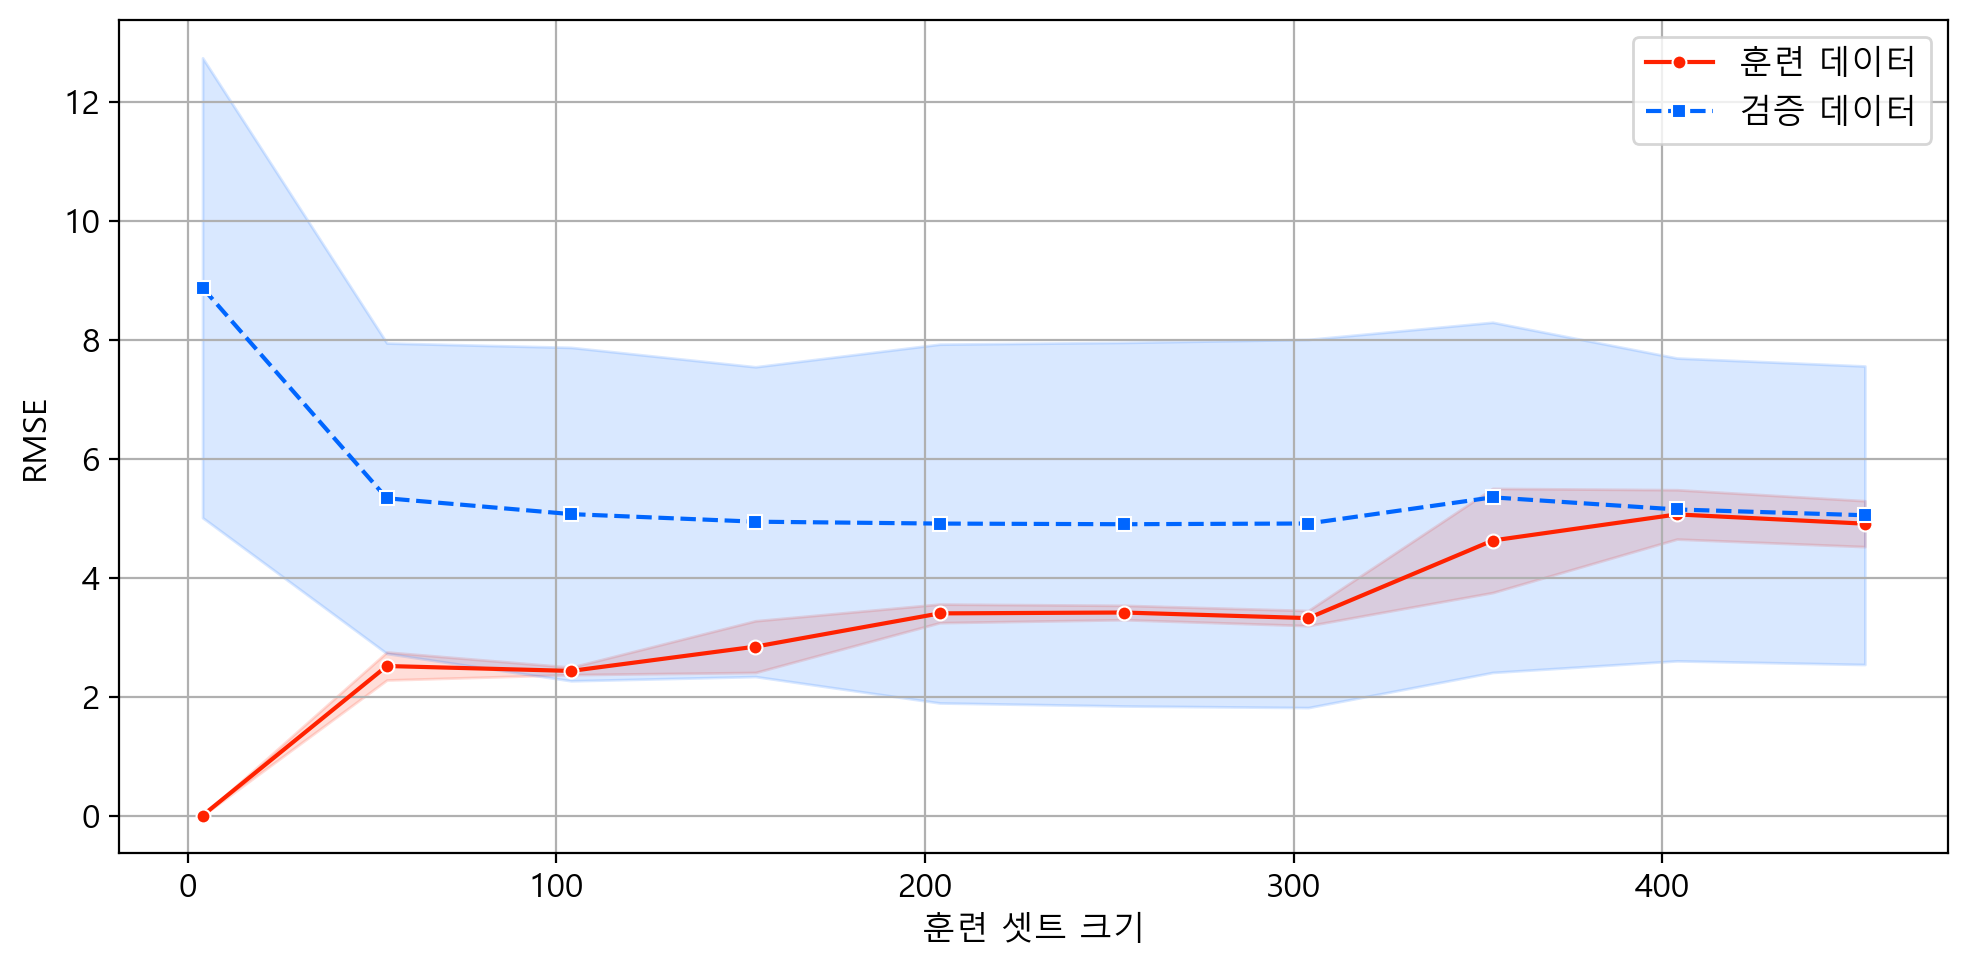


[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+--------+------------+---------|
|  0 | MEDV       | NOX        |            -1.7329 |      1.087 |           -0.358 | -1.595 |      0.114 | 3.25832 |
|  1 | MEDV       | RM         |              3.238 |      0.872 |            0.182 |  3.714 |          0 | 2.10697 |
|  2 | MEDV       | DIS        |            -2.2881 |      1.101 |            -0.39 | -2.077 |       0.04 | 2.98093 |
|  3 | MEDV       | PTRATIO    |            -2.1035 |      0.649 |           -0.325 | -3.242 |      0.002 | 1.30463 |
|  4 | MEDV       | LSTAT      |            -4.2735 |      0.956 |           -0.436 |  -4.47 |          0 | 2.63433 |
+----+------------+------------+--------------------+------------+--

LinearRegression(n_jobs=-1)

In [17]:
ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
x_train_drop = x_train.drop(ignore, axis=1)
x_test_drop = x_test.drop(ignore, axis=1)

my_linear_regression(x_train_drop, y_train, x_test_drop, y_test, use_plot=False, report=True)

### [4] 모듈화 기능을 활용한 학습 곡선 확인

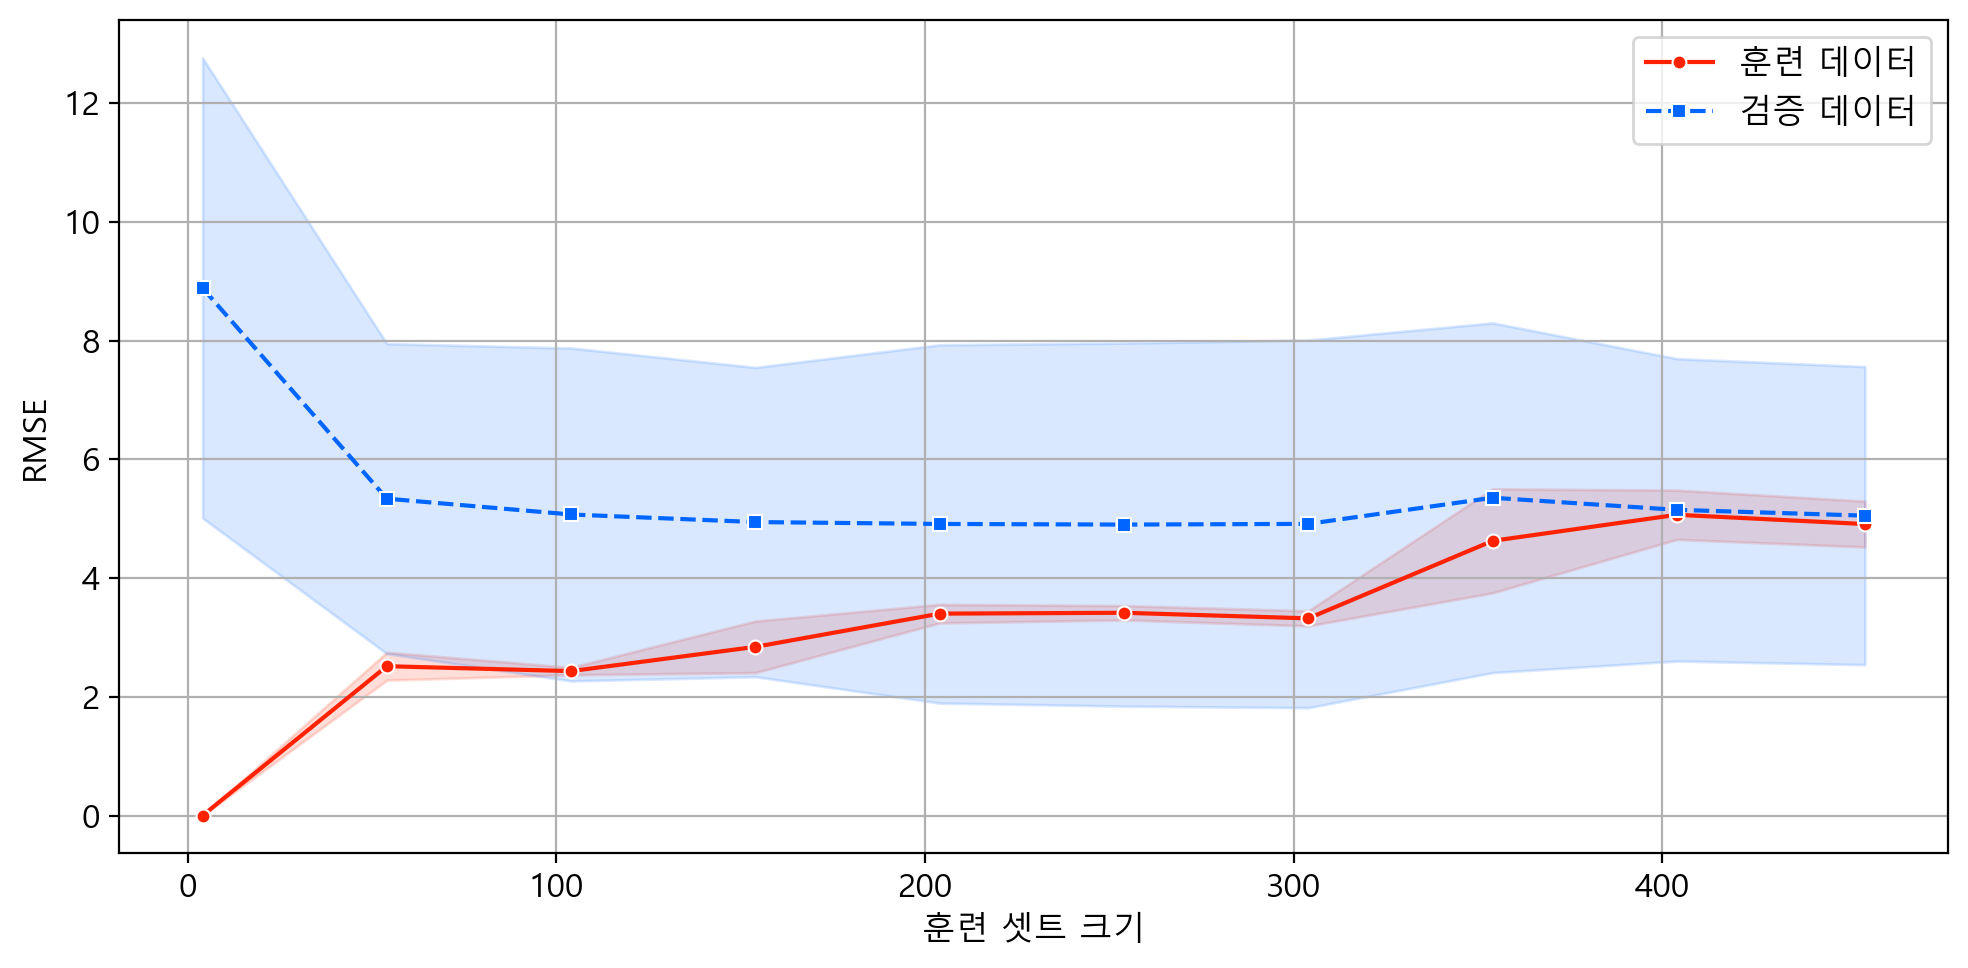

In [18]:
df = origin.drop(ignore, axis=1)
my_learing_curve(fit, data=df, yname='MEDV', scalling=True, scoring='RMSE')

> 훈련곡선으로 보아 에러율이 높고 훈련 데이터와 검증 데이터 곡선간의 간격이 다소 크게 나타나는 것으로 보아 과대적합이 발생하고 있다.
>
> 다만 샘플 크기가 400을 넘어서면서 간격이 줄어들고 일정하게 유지되기 시작한 것으로 보아 더 많은 샘플을 투입하여 학습할 경우 이 간격이 유지되는지에 대한 확인이 필요하다.